## Computational Neuroscience Assignment 1
### Authors:
* Jochem Beurskens s4637801
* Kirina van der Bijl S1061566
* Arne Diehl S4451392

In [ ]:
import numpy as np
import scipy as sp
from scipy import optimize, integrate
import sympy as simp
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

## Exercise 1
### 1.a) Solve by hand using Newton’s method the equation $f(x) = x^2 − 2 = 0$
Assume we are at $x_n$ and we want to find the next point closer to the root then we might take a step to $x_{n+1}$ of size h and thus are at $f(x_{n+1}) = f(x_n+h)$.

Using first order taylor expansion we get $f(x_{n+1}) = f(x_n)+h*f'(x_n)$

Since we are looking for the root, we set $f(x_{n+1})$ to zero: $f(x_n)+h*f'(x_n)=0$

Solving for h gives us $h = -\dfrac{f(x_n)}{f'(x_n)}$

Thus our steps are defined by $x_{n+1} = x_{n} - \dfrac{f(x_n)}{f(x_n)}$

We take $x_0 = 1$

We have $f(x) = x^2 - 2$ and $f'(x)=2x$

Now $x_1 = x_0 - \dfrac{f(x_0)}{f'(x_0)}=1-\dfrac{(-1)}{2}=1.5$

Now $x_2 = 1.5 -\dfrac{0.25}{3} \approx 1.5-0.083 = 1.417$

Now $x_3 = 1.417 -\dfrac{0.0079}{2.834}=1.417 - 0.0028 = 1.4142$

Now $x_4 = 1.4142 -\dfrac{(-0.00003836)}{2.8284} = 1.4142 + 0.000013562438128 = 1.414213562438128$

Now our estimate of $1.414213562438128$ is correct to the 9th digit after the dot.

### 1.b) Implement Newton’s method in matlab[sick] for $f(x)=x e^{(-x)}+1$


In [ ]:
def newton_implementation(func, der_func, x_0, steps):
  x = np.empty((steps))
  x[0] = x_0
  for i in range(1, x.shape[0]):
    x[i]= x[i-1] - (func(x[i-1]) / der_func(x[i-1]))
  return x

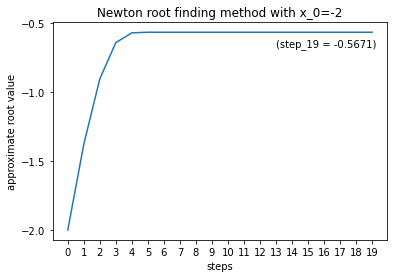

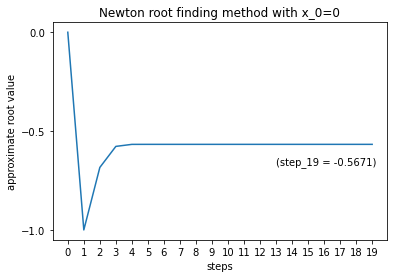

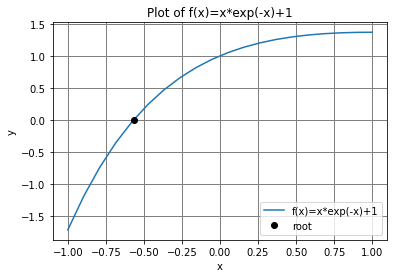

In [ ]:
func = lambda x: x*np.exp(-x)+1
der_func = lambda x: -x*np.exp(-x)+np.exp(-x)
steps = 20

root = newton_implementation(func, der_func, x_0=-2, steps=steps)

plt.plot(root)
plt.title('Newton root finding method with x_0=-2')
plt.ylabel('approximate root value')
plt.xlabel('steps')
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(0.5))
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(1))
plt.text(13, root[-1]-0.10, '(step_{} = {:.4f})'.format(steps-1,root[-1]))
plt.show()

root = newton_implementation(func, der_func, x_0=0, steps=steps)

plt.plot(root) 
plt.title('Newton root finding method with x_0=0')
plt.ylabel('approximate root value')
plt.xlabel('steps')
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(0.5))
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(1))
plt.text(13, root[-1]-0.10, '(step_{} = {:.4f})'.format(steps-1,root[-1]))
plt.show()

domain = np.linspace(-1,1,20)

plt.plot(domain,func(domain), label="f(x)=x*exp(-x)+1")
plt.plot(root[-1], 0, 'o', color='black', label="root")
plt.legend(loc='lower right')
plt.title('Plot of f(x)=x*exp(-x)+1')
plt.ylabel('y')
plt.xlabel('x')
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(0.5))
plt.gca().grid(which='major', color='gray', linestyle='-', linewidth=1)
plt.show()


The graphs above show that our implementation of the newton method works as expected, as the root appears to be between -0.75 and -0.5, which is where we converge to with -0.5671.

### 1.c) Given $f(x,a)=x \exp(-x)+a$, find out for what a-values you can expect solutions and plot them as a function of ‘a’.

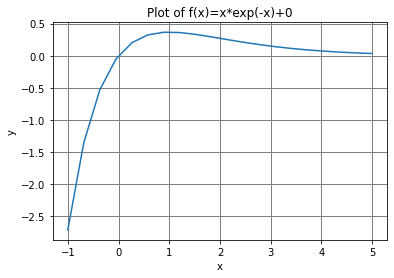

In [ ]:
func=lambda x,a:x*np.exp(-x)+a
y = func(np.linspace(-1,5,20),0)

plt.plot(np.linspace(-1,5,20),y) #a plot of the convergence of the newton rule
plt.title('Plot of f(x)=x*exp(-x)+0')
plt.ylabel('y')
plt.xlabel('x')
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(0.5))
# plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(1))
plt.gca().grid(which='major', color='gray', linestyle='-', linewidth=1)
# plt.text(13, x[-1]-0.10, '(x_{} = {:.4f})'.format(steps-1,x[-1]))
plt.show()

A helpful point comes from the lecture notes which states that "$\alpha$	is	short	hand	for	the	derivative	at	the	fixed	point. When	$\alpha > 0$,	the	perturbation increases	over	time,	thus	the	fixed	point	is	unstable. When $\alpha < 0$, the	perturbation	decreases	over	time,	thus	the	fixed	point	is	stable."

We see that for the function $f(x,a)=x \exp(-x)+a$, when $x$ is negative, the term $\dfrac{x}{e^x}$ will be of the form $-x*e^x$ and thus still be negative. When $a$ is negative, the potential zero can only occur when $\dfrac{x}{e^x}$ is bigger than $a$. From 0 to 1, this part grows and from 1 to infinity it shrinks to zero. This is due to the lim(x*exp(-x))=0 as x-> inf. Thus the formula approaches 0, but never reaches it. Proof: using l'Hopitals rule(take derivative of upper and lower term seperately): lim(x/e^x)=lim(1/e^x)=0.

It's maximum is at $f(1)=1/e$. Thus we will find two roots when a is bigger $-1/e$ and smaller than $0$. And we will find one root when a is bigger than or equal to 0. When $a = -1/e$ we will find only one root. We can therefore find and plot the needed roots as follows:

Notice that for a=0: the line only crosses y=0 once, thus this is the location of the switch from 2 to 1 node. 


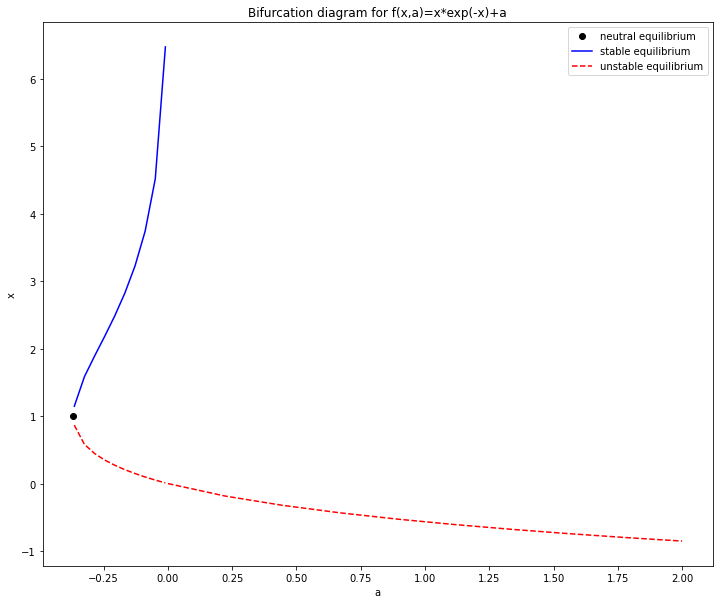

In [ ]:
func=lambda x,a:x*np.exp(-x)+a
der_func = lambda x: -np.exp(-x)*(-1 + x)

aspace1 = -1/np.exp(1)
aspace2 = np.linspace(-1/np.exp(1)+0.0036,-0.01,10)
aspace3 = np.linspace(0,2,10)

roots1 = newton_implementation(func=lambda x: func(x,-1/np.exp(1)), der_func=der_func, x_0=0.8, steps=20)[-1]
roots2 = np.array([newton_implementation(func=lambda x: func(x,r), der_func=der_func, x_0=2.01, steps=20)[-1] for r in aspace2]).flatten()
roots3 = np.array([newton_implementation(func=lambda x: func(x,r), der_func=der_func, x_0=0.01, steps=20)[-1] for r in aspace2]).flatten()
roots4 = np.array([newton_implementation(func=lambda x: func(x,r), der_func=der_func, x_0=0.00, steps=20)[-1] for r in aspace3]).flatten()

plt.figure(figsize=(12,10))

plt.plot([aspace1], roots1, 'o', alpha=1, color='black', label = 'neutral equilibrium')
plt.plot(aspace2,roots2, '-', c="b", label = 'stable equilibrium')
plt.plot(aspace2,roots3, '--', c="r", label = 'unstable equilibrium')
plt.plot(aspace3,roots4, '--', c="r")

plt.title('Bifurcation diagram for f(x,a)=x*exp(-x)+a')
plt.ylabel('x')
plt.xlabel('a')
plt.legend(loc='upper right')
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(0.25))
plt.show()

In the graph above we know that the dotted line is unstable since the derivative of $f(x,a)$ is positive for $x< 1$. Equivalently the blue line represents stable fixed points, since the derivative is negative for $x>1$.

### 1.d) Construct using ‘scipy.optimize.fsolve’ the bifurcation diagram as in 1.c

This time we essentially seek to do the same thing, but instead of using our own implementation of the newton method, we will use the scipy function fsolve.

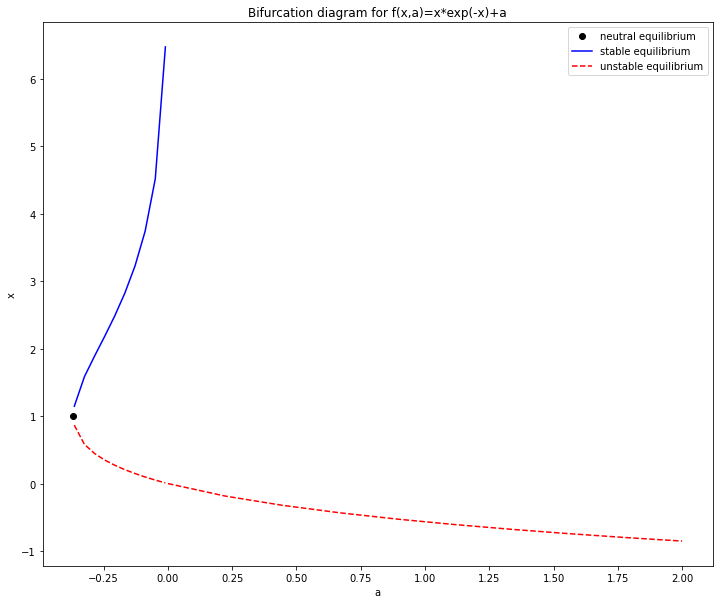

In [ ]:
func=lambda x,a:x*np.exp(-x)+a

aspace1 = -1/np.exp(1)
aspace2 = np.linspace(-1/np.exp(1)+0.0036,-0.01,10)
aspace3 = np.linspace(0,2,10)

roots1 = optimize.fsolve(func=func, x0=0.8, args=-1/np.exp(1))
roots2 = np.array([optimize.fsolve(func=func, x0=2.01, args=r) for r in aspace2]).flatten()
roots3 = np.array([optimize.fsolve(func=func, x0=0.01, args=r) for r in aspace2]).flatten()
roots4 = np.array([optimize.fsolve(func=func, x0=0, args=r) for r in aspace3]).flatten()

plt.figure(figsize=(12,10))

plt.plot([aspace1], roots1, 'o', color='black', label = 'neutral equilibrium')
plt.plot(aspace2,roots2, '-', c="b", label = 'stable equilibrium')
plt.plot(aspace2,roots3, '--', c="r", label = 'unstable equilibrium')
plt.plot(aspace3,roots4, '--', c="r")

plt.title('Bifurcation diagram for f(x,a)=x*exp(-x)+a')
plt.ylabel('x')
plt.xlabel('a')
plt.legend(loc='upper right')
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(0.25))
plt.show()

As we can see, this bifurcation diagram and the one created with our own implementation of the newton method are very much the same. This suggests that we implemented it correctly.

## Exercise 2
### 2.a) Solve the differential equation $y’=f(x,y)=-2x-y$ with $y(0)=-1$ on the interval $[0,1]$.

### Use different step size (h) values (0.5, 0.25, etc).




#### 2.a.1 Using Euler-Approximation



In [ ]:
def euler_approximation(ode, y0 = -1, x0 = 0, stepsize = 0.25, interval_len=1):
  """
  Euler approximation
  input
    y0: initial y
    x0: initial x (independent variable, normally called t in euler approximation)
    stepsize: the stepsize
    interval_len: the interval length
  output
    approximateF: array with approximation of the trajectory starting with position y0 and the independent variable x0
  """
  total_steps = int(interval_len / stepsize)
  approximateY = np.empty((total_steps+1))
  X = np.empty((total_steps+1))
  approximateY[0] = y0
  X[0] = x0
  for i in range(1,total_steps+1):
    approximateY[i] = approximateY[i-1] + stepsize * ode(approximateY[i-1],X[i-1])
    X[i] = X[i-1] + stepsize

  return X, approximateY

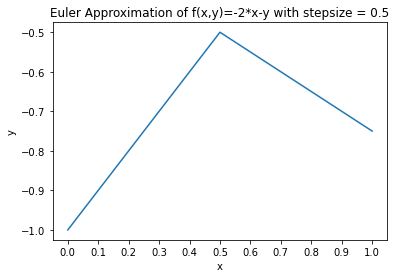

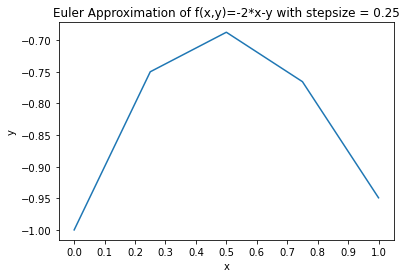

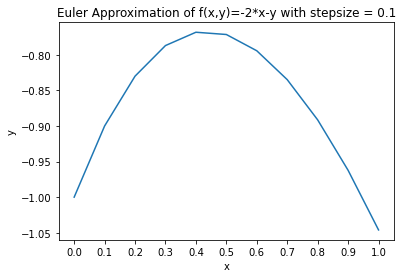

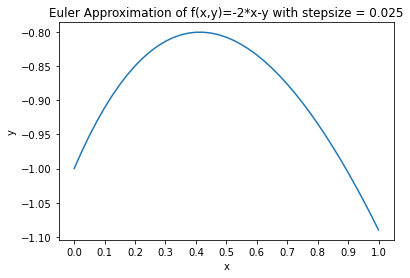

In [ ]:
#Settings
y0 = -1
x0 = 0
interval_len = 1
ode = lambda y,x: -2*x-y

stepsize = 0.5
X, Y = euler_approximation(ode=ode, y0 = y0, x0 = x0, stepsize = stepsize, interval_len=interval_len)
plt.plot(X, Y)
plt.ylabel('y')
plt.xlabel('x')
plt.title('Euler Approximation of f(x,y)=-2*x-y with stepsize = {}'.format(stepsize))
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(0.1))
plt.show()

stepsize = 0.25
X, Y = euler_approximation(ode=ode, y0 = y0, x0 = x0, stepsize = stepsize, interval_len=interval_len)
plt.plot(X, Y)
plt.ylabel('y')
plt.xlabel('x')
plt.title('Euler Approximation of f(x,y)=-2*x-y with stepsize = {}'.format(stepsize))
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(0.1))
plt.show()

stepsize = 0.1
X, Y = euler_approximation(ode=ode, y0 = y0, x0 = x0, stepsize = stepsize, interval_len=interval_len)
plt.plot(X, Y)
plt.ylabel('y')
plt.xlabel('x')
plt.title('Euler Approximation of f(x,y)=-2*x-y with stepsize = {}'.format(stepsize))
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(0.1))
plt.show()

stepsize = 0.025
X, Y = euler_approximation(ode=ode, y0 = y0, x0 = x0, stepsize = stepsize, interval_len=interval_len)
plt.plot(X, Y)
plt.ylabel('y')
plt.xlabel('x')
plt.title('Euler Approximation of f(x,y)=-2*x-y with stepsize = {}'.format(stepsize))
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(0.1))
plt.show()

#### 2.a.2 Using Second order Runge-Kutta-Approximation (Modified Euler-Approximation)


In [ ]:
def modified_euler_approximation(ode, y0 = -1, x0 = 0, stepsize = 0.25, interval_len=1):
  """
  Euler approximation
  input
    y0: initial y
    x0: initial x (independent variable, normally called t in euler approximation)
    stepsize: the stepsize
    interval_len: the interval length
  output
    approximateF: array with approximation of the trajectory starting with position y0 and the independent variable x0
  """
  total_steps = int(interval_len / stepsize)
  approximateY = np.empty((total_steps+1))
  X = np.empty((total_steps+1))
  approximateY[0] = y0
  X[0] = x0
  for i in range(1,total_steps+1):
    y_bar = approximateY[i-1] + stepsize * ode(approximateY[i-1],X[i-1])
    approximateY[i] = approximateY[i-1] + (1/2) * stepsize * (ode(approximateY[i-1],X[i-1]) + ode(y_bar,X[i-1]+stepsize))
    X[i] = X[i-1] + stepsize

  return X, approximateY

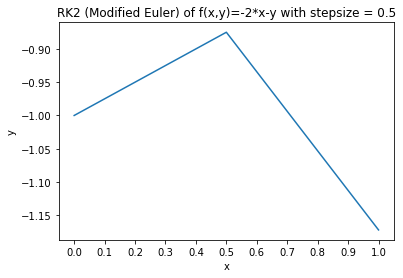

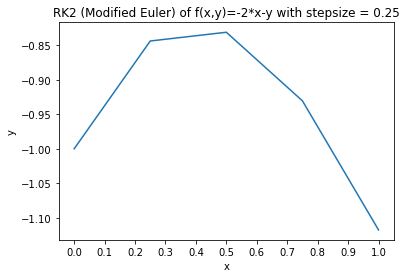

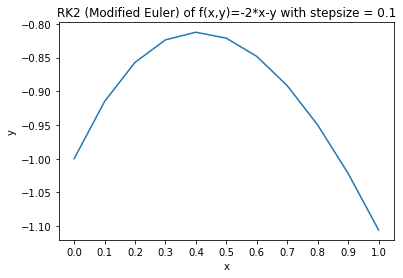

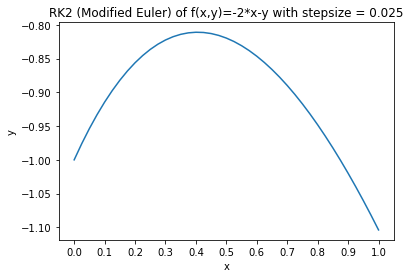

In [ ]:
#Settings
y0 = -1
x0 = 0
interval_len = 1
ode = lambda y,x: -2*x-y

stepsize = 0.5
X, Y = modified_euler_approximation(ode=ode, y0 = y0, x0 = x0, stepsize = stepsize, interval_len=interval_len)
plt.plot(X, Y)
plt.ylabel('y')
plt.xlabel('x')
plt.title('RK2 (Modified Euler) of f(x,y)=-2*x-y with stepsize = {}'.format(stepsize))
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(0.1))
plt.show()

stepsize = 0.25
X, Y = modified_euler_approximation(ode=ode, y0 = y0, x0 = x0, stepsize = stepsize, interval_len=interval_len)
plt.plot(X, Y)
plt.ylabel('y')
plt.xlabel('x')
plt.title('RK2 (Modified Euler) of f(x,y)=-2*x-y with stepsize = {}'.format(stepsize))
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(0.1))
plt.show()

stepsize = 0.1
X, Y = modified_euler_approximation(ode=ode, y0 = y0, x0 = x0, stepsize = stepsize, interval_len=interval_len)
plt.plot(X, Y)
plt.ylabel('y')
plt.xlabel('x')
plt.title('RK2 (Modified Euler) of f(x,y)=-2*x-y with stepsize = {}'.format(stepsize))
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(0.1))
plt.show()

stepsize = 0.025
X, Y = modified_euler_approximation(ode=ode, y0 = y0, x0 = x0, stepsize = stepsize, interval_len=interval_len)
plt.plot(X, Y)
plt.ylabel('y')
plt.xlabel('x')
plt.title('RK2 (Modified Euler) of f(x,y)=-2*x-y with stepsize = {}'.format(stepsize))
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(0.1))
plt.show()

#### 2.a.3 Compare them using the analytical answer y(x)=-3exp(-x)-2x+2


In [ ]:
#Settings
y0 = -1
x0 = 0
interval_len = 1
ode = lambda y,x: -2*x-y
stepsize=0.025

_, Y1 = euler_approximation(ode=ode, y0 = y0, x0 = x0, stepsize = stepsize, interval_len=interval_len)
_, Y2 = modified_euler_approximation(ode=ode, y0 = y0, x0 = x0, stepsize = stepsize, interval_len=interval_len)
Y3 = (lambda x: -3*np.exp(-x)-2*x+2)(1)
print("With Euler method: y(1) = {:.4f}".format(Y1[-1]))
print("With RK2 (modified Euler) method: y(1) = {:.4f}".format(Y2[-1]))
print("Analytical Solution: y(1) = {:.4f}".format(Y3))

print("2D distance from analytical solution for euler: {:.4f}".format(np.sqrt((Y1[-1]-Y3)**2)))
print("2D distance from analytical solution for RK2: {:.4f}".format(np.sqrt((Y2[-1]-Y3)**2)))
print("relative error ratio between euler and RK2: ",int(np.sqrt((Y1[-1]-Y3)**2)/np.sqrt((Y2[-1]-Y3)**2)))

With Euler method: y(1) = -1.0897
With RK2 (modified Euler) method: y(1) = -1.1038
Analytical Solution: y(1) = -1.1036
2D distance from analytical solution for euler: 0.0139
2D distance from analytical solution for RK2: 0.0001
relative error ratio between euler and RK2:  119


In the calculation above we can see that the euclidian distance from the analytical solution is roughly 119 times worse with the euler method compared to the modified Euler method. When the stepsize is set to 0.0025 this ratio increases to around 1199. This suggests an antiproportional relationship between the relative error ratio between the euler method and RK2. 

In [ ]:
stepsize = 0.025
relativ_error = int(3/stepsize)
print(relativ_error)

120


It seems that this relationship can roughly be estimated by the following formula: $\text{relative error}=3*\text{stepsize}^{-1}$




### 2.b) Plot the solution to $y’=f(x,y)=-2x-y$ with built in methods (scipy.integrate.solve_ivp)


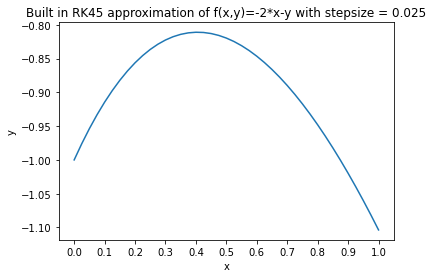

With built in RK4 method: y(1) = -1.1036
Analytical Solution: y(1) = -1.1036
2D distance from analytical solution for RK2: 0.0000


In [ ]:
#Settings
y0 = -1
x0 = 0
interval_len = 1
ode = lambda x,y: -2*x-y

stepsize = 0.025
result = integrate.solve_ivp(fun=ode, t_span = (x0,interval_len), y0=[y0],method='RK45', max_step=stepsize)
plt.plot(result.t, result.y[0,:])
plt.ylabel('y')
plt.xlabel('x')
plt.title('Built in RK45 approximation of f(x,y)=-2*x-y with stepsize = {}'.format(stepsize))
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(0.1))
plt.show()
Y2 = (lambda x: -3*np.exp(-x)-2*x+2)(1)
print("With built in RK4 method: y(1) = {:.4f}".format(result.y[0,-1]))
print("Analytical Solution: y(1) = {:.4f}".format(Y2))
print("2D distance from analytical solution for RK2: {:.4f}".format(np.sqrt((result.y[0,-1]-Y2)**2)))

### 2.c) Show that $\dfrac{d^2\theta}{dt^2}=-sin(\theta)+I$ is equal to the following system of ode's: $y_1'=y_2$ and $y_2'=I-sin(y_1)$ [This](https://www.youtube.com/watch?v=l_YND1hSUmY) youtube link might help.

We are given $\dfrac{d^2\theta}{dt^2}=-sin(\theta)+I$

We rewrite this to the following form: $y''=-sin(y)+I$

We take $u=y$ and $v=y'$ and their derivatives $u'=y'$ and $v'=y''$

Now we have that $u'=v$ and $v'=I-sin(u)$

Now we use change the formular names to the ones used in the assignment and we have the desired ode's: $y_1'=y_2$ and $y_2'=I-sin(y_1)$


### 2.d) Implement modified Euler and plot $y_2 \text{ vs } y_1$

In [ ]:
def modified_euler_approximation_vectorized(ode, y0 = -1, x0 = 0, stepsize = 0.25, interval_len=1):
  """
  Euler approximation
  input
    y0: initial y
    x0: initial x (independent variable, normally called t in euler approximation)
    stepsize: the stepsize
    interval_len: the interval length
  output
    approximateF: array with approximation of the trajectory starting with position y0 and the independent variable x0
  """
  total_steps = int(interval_len / stepsize)
  approximateY = np.empty((y0.shape[0],total_steps+1))
  X = np.empty((total_steps+1))
  approximateY[:,0] = y0
  X[0] = x0
  for i in range(1,total_steps+1):
    y_bar = approximateY[:,i-1] + stepsize * ode(X[i-1], approximateY[:,i-1])
    approximateY[:,i] = approximateY[:,i-1] + (1/2) * stepsize * (ode(X[i-1], approximateY[:,i-1]) + ode(X[i-1]+stepsize, y_bar))
    X[i] = X[i-1] + stepsize

  return X, approximateY

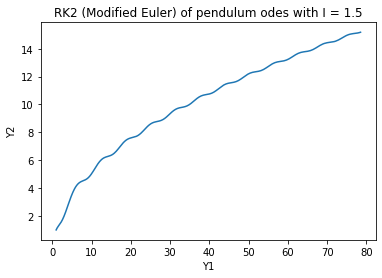

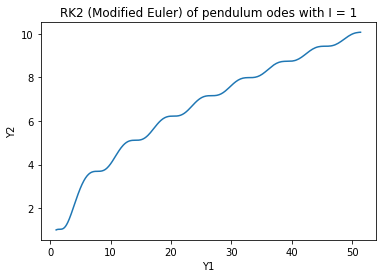

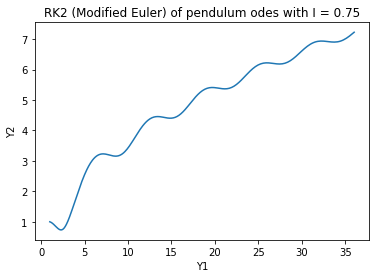

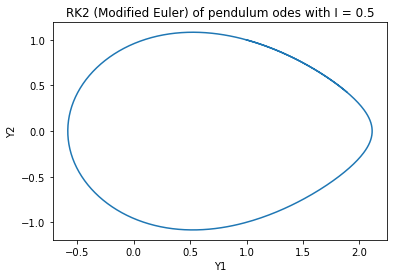

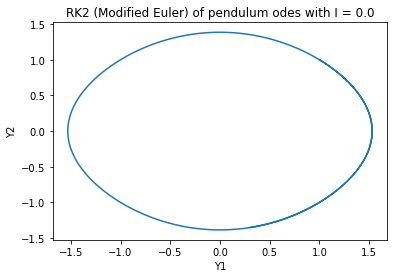

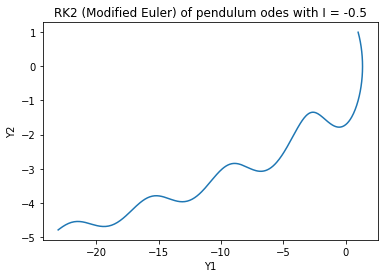

In [ ]:
#Settings
y10 = 1
y20 = 1
Y0=np.array([1,1])
interval_len = 10
stepsize = 0.025
ode_I = lambda x,Y,I: np.array([Y[1], I-np.sin(Y[0])])


I=1.5
_, Y = modified_euler_approximation_vectorized(ode=lambda x,Y: ode_I(x,Y,I), y0 = Y0, x0 = 0, stepsize = stepsize, interval_len=interval_len)
plt.plot(Y[0,:], Y[1,:])
plt.ylabel('Y2')
plt.xlabel('Y1')
plt.title('RK2 (Modified Euler) of pendulum odes with I = {}'.format(I))
# plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(1))
plt.show()

I=1
_, Y = modified_euler_approximation_vectorized(ode=lambda x,Y: ode_I(x,Y,I), y0 = Y0, x0 = 0, stepsize = stepsize, interval_len=interval_len)
plt.plot(Y[0,:], Y[1,:])
plt.ylabel('Y2')
plt.xlabel('Y1')
plt.title('RK2 (Modified Euler) of pendulum odes with I = {}'.format(I))
# plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(1))
plt.show()

I=0.75
_, Y = modified_euler_approximation_vectorized(ode=lambda x,Y: ode_I(x,Y,I), y0 = Y0, x0 = 0, stepsize = stepsize, interval_len=interval_len)
plt.plot(Y[0,:], Y[1,:])
plt.ylabel('Y2')
plt.xlabel('Y1')
plt.title('RK2 (Modified Euler) of pendulum odes with I = {}'.format(I))
# plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(1))
plt.show()

I=0.5
_, Y = modified_euler_approximation_vectorized(ode=lambda x,Y: ode_I(x,Y,I), y0 = Y0, x0 = 0, stepsize = stepsize, interval_len=interval_len)
plt.plot(Y[0,:], Y[1,:])
plt.ylabel('Y2')
plt.xlabel('Y1')
plt.title('RK2 (Modified Euler) of pendulum odes with I = {}'.format(I))
# plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(1))
plt.show()

I=0.0
_, Y = modified_euler_approximation_vectorized(ode=lambda x,Y: ode_I(x,Y,I), y0 = Y0, x0 = 0, stepsize = stepsize, interval_len=interval_len)
plt.plot(Y[0,:], Y[1,:])
plt.ylabel('Y2')
plt.xlabel('Y1')
plt.title('RK2 (Modified Euler) of pendulum odes with I = {}'.format(I))
# plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(1))
plt.show()

I=-0.5
_, Y = modified_euler_approximation_vectorized(ode=lambda x,Y: ode_I(x,Y,I), y0 = Y0, x0 = 0, stepsize = stepsize, interval_len=interval_len)
plt.plot(Y[0,:], Y[1,:])
plt.ylabel('Y2')
plt.xlabel('Y1')
plt.title('RK2 (Modified Euler) of pendulum odes with I = {}'.format(I))
# plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(1))
plt.show()

### 2.e) plot $y_2 \text{ vs } y_1$ using a built in function.

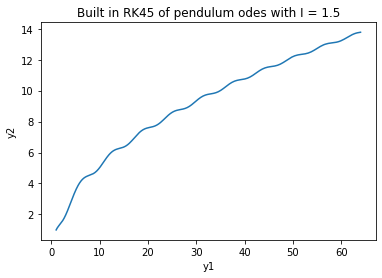

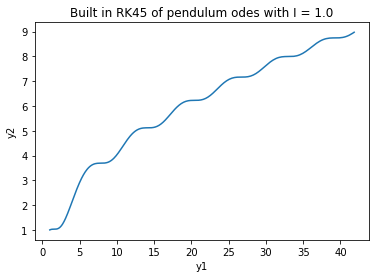

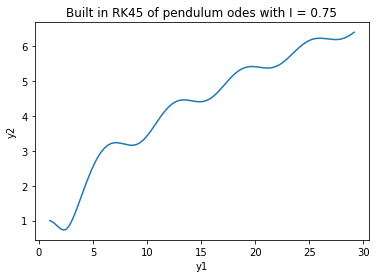

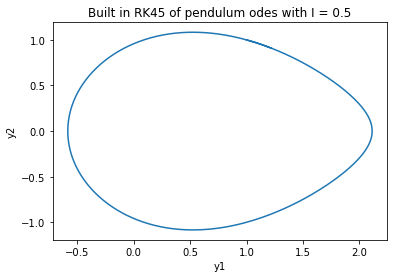

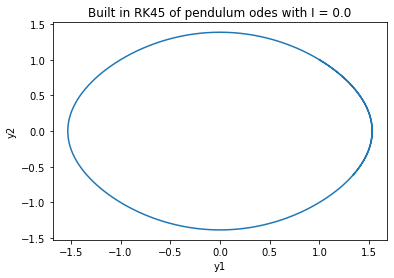

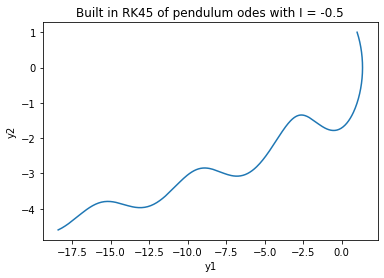

In [ ]:
#Settings
Y0 = np.array([1,1])
x0 = 1
interval_len = 10
stepsize = 0.025
ode_I = lambda x,Y,I: np.array([Y[1], I-np.sin(Y[0])])

I=1.5
result = integrate.solve_ivp(fun=lambda x,Y: ode_I(x,Y,I), t_span = (x0,interval_len), y0=Y0,method='RK45', max_step=stepsize)
plt.plot(result.y[0,:], result.y[1,:])
plt.ylabel('y2')
plt.xlabel('y1')
plt.title('Built in RK45 of pendulum odes with I = {}'.format(I))
# plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(0.1))
plt.show()

I=1.0
result = integrate.solve_ivp(fun=lambda x,Y: ode_I(x,Y,I), t_span = (x0,interval_len), y0=Y0,method='RK45', max_step=stepsize)
plt.plot(result.y[0,:], result.y[1,:])
plt.ylabel('y2')
plt.xlabel('y1')
plt.title('Built in RK45 of pendulum odes with I = {}'.format(I))
# plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(0.1))
plt.show()

I=0.75
result = integrate.solve_ivp(fun=lambda x,Y: ode_I(x,Y,I), t_span = (x0,interval_len), y0=Y0,method='RK45', max_step=stepsize)
plt.plot(result.y[0,:], result.y[1,:])
plt.ylabel('y2')
plt.xlabel('y1')
plt.title('Built in RK45 of pendulum odes with I = {}'.format(I))
# plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(0.1))
plt.show()

I=0.5
result = integrate.solve_ivp(fun=lambda x,Y: ode_I(x,Y,I), t_span = (x0,interval_len), y0=Y0,method='RK45', max_step=stepsize)
plt.plot(result.y[0,:], result.y[1,:])
plt.ylabel('y2')
plt.xlabel('y1')
plt.title('Built in RK45 of pendulum odes with I = {}'.format(I))
# plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(0.1))
plt.show()

I=0.0
result = integrate.solve_ivp(fun=lambda x,Y: ode_I(x,Y,I), t_span = (x0,interval_len), y0=Y0,method='RK45', max_step=stepsize)
plt.plot(result.y[0,:], result.y[1,:])
plt.ylabel('y2')
plt.xlabel('y1')
plt.title('Built in RK45 of pendulum odes with I = {}'.format(I))
# plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(0.1))
plt.show()

I=-0.5
result = integrate.solve_ivp(fun=lambda x,Y: ode_I(x,Y,I), t_span = (x0,interval_len), y0=Y0,method='RK45', max_step=stepsize)
plt.plot(result.y[0,:], result.y[1,:])
plt.ylabel('y2')
plt.xlabel('y1')
plt.title('Built in RK45 of pendulum odes with I = {}'.format(I))
# plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(0.1))
plt.show()

## Exercise 3
### 3.a) Determine the analytical solution of $y''+by'+y = 0$ and characterize the nature of these solutions

We have $y''+by'+y = 0$

We substitute $y=e^{rx}$

Now we have $r^2e^{rx}+bre^{rx}+e^{rx} = 0$

Simplifying yields $e^{rx}(r^2+br+1) = 0$

Further simplification yields $r^2+br+1 = 0$

Solving for r using the pq formula yields $r_{1,2} = \dfrac{-b}{2} \pm \sqrt{\left(\dfrac{b}{2}\right)^2-1}$

Now we know that y is either $y=e^{r_1x}$ or $y=e^{r_2x}$ or a combination of the two like this: $y=A*e^{r_1x} + B*e^{r_2x}$


### 3.b) 
#### 3.b.1. Convert the second order equation $y'' = -by'-y$ into a system of first order odes

We are given $y''=-by'-y$

We take $u=y$ and $v=y'$ and their derivatives $u'=y'$ and $v'=y''$

Now we have that $u'=v$ and $v'=-bv-u$

Now we use change the formular names to the ones used in the assignment and we have the desired odes: $y_1'=y_2$ and $y_2'=-by_2-y_1$

#### 3.b.2. Determine the fixed points

Given that we have $y_1'=y_2$ and $y_2'=-by_2-y_1$ we can immediately see, that fixed points must have $y_2=0$. This in turn also means that $y_1=0$ since anything else leads to $y_2'\neq 0$. This also means that the fixed points are not dependent on b.

#### 3.b.3. Determine the fixed points stability

In order for us to determine the fixed points stability, we need to calculate the jacobian for the system.

$J=\left(
\begin{array}{cc}
\dfrac{\partial y_1'}{\partial y_1} & \dfrac{\partial y_1'}{\partial y_2} \\
\dfrac{\partial y_2'}{\partial y_1} & \dfrac{\partial y_2'}{\partial y_2}
\end{array}
\right)=\left(
\begin{array}{cc}
0&1\\
-1&-b
\end{array}
\right)$

Now we need to calculate the eigenvalue for the point $(0,0)$

$E(0,0)=\left(
\begin{array}{cc}
0&1\\
-1&-b
\end{array}
\right)$

1. $\lambda*I=\lambda*\left(
\begin{array}{cc}
1&0\\
0&1
\end{array}
\right)=\left(
\begin{array}{cc}
\lambda&0\\
0&\lambda
\end{array}
\right)$
2. $J-\lambda*I=\left(
\begin{array}{cc}
0&1\\
-1&-b
\end{array}
\right)-\left(
\begin{array}{cc}
\lambda&0\\
0&\lambda
\end{array}
\right)=\left(
\begin{array}{cc}
-\lambda&1\\
-1&-b-\lambda
\end{array}
\right)$
3. $d = (-\lambda) * (-b-\lambda)- (-1)*(1)=b\lambda+\lambda^2 +1=\lambda^2 + b\lambda+1$ 
4. $e_{1,2} = \dfrac{-b}{2} \pm \sqrt{\left(\dfrac{b}{2}\right)^2-1}$
5. Due to the subtraction inside the square root, this term is always smaller than the fraction in front of the root. Thus it only depends on this term, whether the resulting eigenvalues are negative or positive.
6. Thus for $b< 0$ the fixed point are stable and for b>0 the fixed points are unstable. For the case b=0 we have eigenvalue 0, which indicates a neutral fixed point. Given that the jacobian matrix does not contain any dependent variables, further derivatives will also be equal to zero and therefore indicate that this indeed is a neutral fixed point.

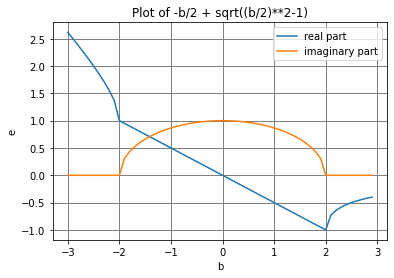

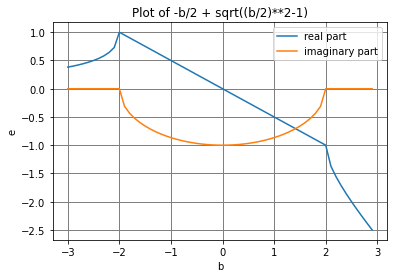

In [ ]:
func = lambda b: -b/2 + np.sqrt(complex((b/2)**2-1))
x = np.arange(start=-3, stop=3, step=0.1)
y = np.array([func(d) for d in x])
plt.plot(x,y.real, label="real part")
plt.plot(x,y.imag, label="imaginary part")
plt.ylabel('e')
plt.xlabel('b')
plt.title('Plot of -b/2 + sqrt((b/2)**2-1)')
plt.legend(loc='upper right')
plt.gca().grid(which='major', color='gray', linestyle='-', linewidth=1)
plt.show()

func = lambda b: -b/2 - np.sqrt(complex((b/2)**2-1))
x = np.arange(start=-3, stop=3, step=0.1)
y = np.array([func(d) for d in x])
plt.plot(x,y.real, label="real part")
plt.plot(x,y.imag, label="imaginary part")
plt.ylabel('e')
plt.xlabel('b')
plt.title('Plot of -b/2 + sqrt((b/2)**2-1)')
plt.legend(loc='upper right')
plt.gca().grid(which='major', color='gray', linestyle='-', linewidth=1)
plt.show()

As we can see in the plot above we find exactly what we just proposed with regards to the value of $e_1$ and $e_2$. Note that only the real part of the eigenvalues determines stability. 

#### 3.b.4. Plot the first order odes in the phase plane (y2 vs y1)


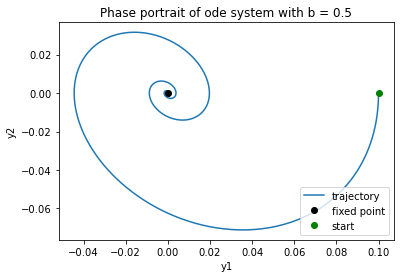

In [ ]:
#Settings
Y0 = np.array([0.1,0])
x0 = 0
interval_len = 100
stepsize = 0.025
ode_I = lambda x,Y,b: np.array([Y[1], -b*Y[1]-Y[0]])

b=0.5
result = integrate.solve_ivp(fun=lambda x,Y: ode_I(x,Y,b), t_span = (x0,interval_len), y0=Y0,method='RK45', max_step=stepsize)
plt.plot(result.y[0,:], result.y[1,:], label="trajectory")
plt.plot(0, 0, 'o', color='black', label = 'fixed point')
plt.plot(Y0[0], Y0[1], 'o', color='green', label = 'start')
plt.ylabel('y2')
plt.xlabel('y1')
plt.title('Phase portrait of ode system with b = {}'.format(b))
plt.legend(loc='lower right')
plt.show()

In the phase plane (y2 vs y1, as described in the assignment) the fixed point stays where it is for all b, as it is not dependent on b.

### 3.C) Find the stability of the equilibrium point at the origin for the nonlinear equation $y''+b(y')^3 + y = 0$

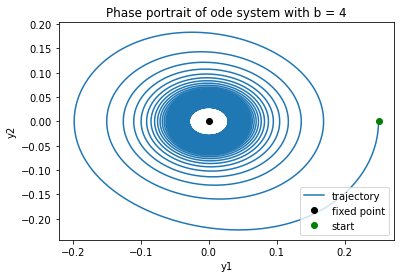

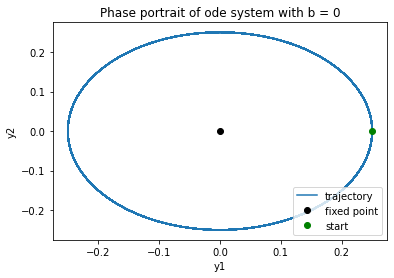

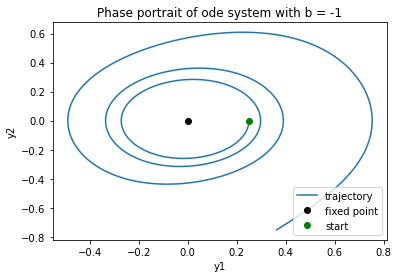

In [ ]:
#Settings
Y0 = np.array([0.25,0])
x0 = 0
interval_len = 400
stepsize = 0.025
ode_I = lambda x,Y,b: np.array([Y[1], -b*Y[1]**3-Y[0]])
b=4

result = integrate.solve_ivp(fun=lambda x,Y: ode_I(x,Y,b), t_span = (x0,interval_len), y0=Y0,method='RK45', max_step=stepsize)
plt.plot(result.y[0,:], result.y[1,:], label="trajectory")
plt.plot(0, 0, 'o', color='black', label = 'fixed point')
plt.plot(Y0[0], Y0[1], 'o', color='green', label = 'start')
plt.ylabel('y2')
plt.xlabel('y1')
plt.title('Phase portrait of ode system with b = {}'.format(b))
plt.legend(loc='lower right')
plt.show()

b=0
result = integrate.solve_ivp(fun=lambda x,Y: ode_I(x,Y,b), t_span = (x0,interval_len), y0=Y0,method='RK45', max_step=stepsize)
plt.plot(result.y[0,:], result.y[1,:], label="trajectory")
plt.plot(0, 0, 'o', color='black', label = 'fixed point')
plt.plot(Y0[0], Y0[1], 'o', color='green', label = 'start')
plt.ylabel('y2')
plt.xlabel('y1')
plt.title('Phase portrait of ode system with b = {}'.format(b))
plt.legend(loc='lower right')
plt.show()

interval_len = 20
b=-1
result = integrate.solve_ivp(fun=lambda x,Y: ode_I(x,Y,b), t_span = (x0,interval_len), y0=Y0,method='RK45', max_step=stepsize)
plt.plot(result.y[0,:], result.y[1,:], label="trajectory")
plt.plot(0, 0, 'o', color='black', label = 'fixed point')
plt.plot(Y0[0], Y0[1], 'o', color='green', label = 'start')
plt.ylabel('y2')
plt.xlabel('y1')
plt.title('Phase portrait of ode system with b = {}'.format(b))
plt.legend(loc='lower right')
plt.show()

Given the trajectories above we can make similar statements about the fixed points as those we made in 3.b). We only have one fixed point, that is $y_1,y_2 = (0,0)$. For positive b, we can see that the trajectories move towards the fixed point, thus indicating a stable fixed point. For b=0 we have neither a stable nor a unstable fixed point, but rather a neutral fixed point, which can be seen in the circle diagrams for trajectories in this case. For negative b, we see trajectories moving away from the fixed point, which indicates an unstable fixed point.